# Cornershop's Data Science Test

## Dev: Mateus Broilo
mateus.brilo90@gmail.com

* Objectives: Fine-Tuning Training and evaluation

# Summary

* Initials
    * Loading Libraries and Packages
    * Configurations
    * Global Variables
* Loading data
    * Prepared Dataset  
* Splitting Train/Test data: 80/20
* XGBoost
    * Fine-Tuning
        * Best Parameters
        * Feature Importance
* Results
* Save model

# Initials
* Loading Libraries and Packages
* Configuration
* Global Variables

## Loading Libraries and Packages

In [2]:
# general
import warnings
import time
import gc

#data
import pandas as pd
import numpy as np
from datetime import (datetime, date)
import geopy.distance

## visualization
import matplotlib.pyplot as plt
import seaborn as sns

## model
import joblib
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import *
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

C:\Users\mbroilo\Anaconda3\envs\broilo\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
ls ..\data\

 O volume na unidade C nÃ£o tem nome.
 O NÃºmero de SÃ©rie do Volume Ã© 1210-43E2

 Pasta de C:\Users\mbroilo\Documents\Arbeit\Personal\projects\cornershop\data

01/04/2022  20:54    <DIR>          .
31/03/2022  18:23    <DIR>          ..
29/03/2022  20:02        64.304.021 20220329_merged_full.csv
29/03/2022  20:02        12.563.082 20220329_merged_predict.csv
29/03/2022  20:03        51.741.160 20220329_merged_train_test.csv
01/04/2022  20:49         1.125.788 20220331_prep_20220329_merged_train_test.csv
               4 arquivo(s)    129.734.051 bytes
               2 pasta(s)   142.334.328.832 bytes disponÃ­veis


## Configurations

In [4]:
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

rc={'font.size': 14, 'axes.labelsize': 14, 'legend.fontsize': 12, 
    'axes.titlesize': 24, 'xtick.labelsize': 14, 'ytick.labelsize': 15}

sns.set(rc=rc)
sns.set_palette("Set2")
sns.set_style("darkgrid")#sns.set_style("whitegrid")

## Global Variables

In [5]:
PATH_RAWDATA = "../raw_data/"
PATH_DATA = "../data/"
DATASET_PREP = "20220331_prep_20220329_merged_train_test.csv"
MODEL = 'XGBRegressor.sav'
DATE = time.strftime("%Y%m%d")
SEED = 42 # The answer to the ultimate question of life, the universe and everything is 42.

# Loading Data
* Prepared Dataset 

## Prepared Dataset 

In [6]:
df = pd.read_csv(PATH_DATA + DATASET_PREP, sep=',', index_col='order_id')
print(df.shape)
df.head()

(8000, 16)


,on_demand,day_of_week,total_minutes,pure_time,found_rate,picking_speed,accepted_rate,rating,distance,no_item,quantity,item,seniority_41dc7c9e385c4d2b6c1f7836973951bf,seniority_50e13ee63f086c2fe84229348bc91b5b,seniority_6c90661e6d2c7579f5ce337c3391dbb9,seniority_bb29b8d0d196b5db5a5350e5e3ae2b1f
order_id,,,,,,,,,,,,,,,,
0004a3841c1eeb6c6e77585a941c21e0,True,friday,39.001464,20.300000,0.8473,2.30,0.920000,4.88,0.579554,8.0,8.000,4,1,0,0,0
0005a6ecbbde1e8d273f5577bcff2c9c,True,friday,41.164442,20.666667,0.8407,1.57,0.840000,4.72,0.989345,2.0,2.000,1,0,1,0,0
0007baeb6700fc203be2d1f1e11222d7,False,saturday,136.453089,15.000000,0.9012,2.50,1.000000,4.92,3.735978,39.0,39.000,22,1,0,0,0
0012195a6a8ca9ec308a3010eeea8ebc,False,saturday,72.853598,18.000000,0.8781,1.27,0.920000,4.88,1.226007,13.0,13.000,11,0,0,1,0
0013011fa72b498b9feb84f4e7104980,False,saturday,143.040919,15.000000,0.8301,3.12,0.857143,5.00,1.905397,65.0,64.636,44,0,1,0,0


# Splitting Train/Test data: 80/20

In [7]:
features = [
    'seniority_41dc7c9e385c4d2b6c1f7836973951bf',
    'seniority_50e13ee63f086c2fe84229348bc91b5b',
    'seniority_6c90661e6d2c7579f5ce337c3391dbb9',
    'seniority_bb29b8d0d196b5db5a5350e5e3ae2b1f',
    'on_demand',
    #day_of_week,
    'pure_time',
    'found_rate',
    'picking_speed',
    'accepted_rate',
    'rating',
    'distance',
    'no_item',
    'quantity',
    'item'
]

features_set2 = list(df[features].drop(columns=[
    'seniority_41dc7c9e385c4d2b6c1f7836973951bf',
    'seniority_50e13ee63f086c2fe84229348bc91b5b',
    'seniority_6c90661e6d2c7579f5ce337c3391dbb9',
    'seniority_bb29b8d0d196b5db5a5350e5e3ae2b1f' 
]))
features_set4 = features


label = ['total_minutes']

Xs2 = df[features_set2]
Xs4 = df[features_set4]
y = df[label]

Xs2_train, Xs2_test, y_train, y_test = train_test_split(Xs2, y, train_size = 0.8, random_state = SEED)
Xs4_train, Xs4_test, y_train, y_test = train_test_split(Xs4, y, train_size = 0.8, random_state = SEED)

In [8]:
print("Features Set2:")
print("Train dataset shape: " + f"{Xs2_train.shape}")
print("Test dataset shape: " + f"{Xs2_test.shape}")
print(40*"-")
print(f"Xs2_train + Xs2_test dataset: {Xs2_train.shape[0] + Xs2_test.shape[0]}")
print(f"Total dataset: {df.shape[0]}\n\n")

print("Features Set4:")
print("Train dataset shape: " + f"{Xs4_train.shape}")
print("Test dataset shape: " + f"{Xs4_test.shape}")
print(40*"-")
print(f"Xs4_train + Xs4_test dataset: {Xs4_train.shape[0] + Xs4_test.shape[0]}")
print(f"Total dataset: {df.shape[0]}")

Features Set2:
Train dataset shape: (6400, 10)
Test dataset shape: (1600, 10)
----------------------------------------
Xs2_train + Xs2_test dataset: 8000
Total dataset: 8000


Features Set4:
Train dataset shape: (6400, 14)
Test dataset shape: (1600, 14)
----------------------------------------
Xs4_train + Xs4_test dataset: 8000
Total dataset: 8000


# XGBoost
* Set2: Fine-Tuning
    * Best Parameters
    * Feature Importance
* Set4: Fine-Tuning
    * Best Parameters
    * Feature Importance

In [8]:
model = xgb.XGBRegressor()

params = {
    "colsample_bytree": uniform(0.7, 0.3), #default=1
    "gamma": uniform(0, 0.5), #default=0
    "learning_rate": uniform(0.03, 0.3), # default=0.3
    "max_depth": randint(2, 6), # default=6
    "n_estimators": randint(100, 150), # default=100
    "subsample": uniform(0.6, 0.4), # default=1
}

search = RandomizedSearchCV(
    model, 
    param_distributions=params, 
    random_state=SEED, 
    n_iter=200, 
    cv=3, 
    verbose=1, 
    n_jobs=1, 
    return_train_score=True
)

## Set2:  Fine-tuning

In [9]:
%%time

search.fit(Xs2_train, y_train)
print(search.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'colsample_bytree': 0.9398611392758547, 'gamma': 0.4125663383463986, 'learning_rate': 0.08592149603644322, 'max_depth': 4, 'n_estimators': 113, 'subsample': 0.8092261699076477}
Wall time: 3min 53s


### Best Parameters

In [10]:
best_params = search.best_params_
colsample_bytree = best_params["colsample_bytree"]
gamma = best_params["gamma"]
learning_rate = best_params["learning_rate"]
max_depth = best_params["max_depth"]
n_estimators = best_params["n_estimators"]
subsample = best_params["subsample"]

In [11]:
xgbrs2 = xgb.XGBRegressor(
    verbosity=0, 
    objective='reg:squarederror', 
    colsample_bytree=colsample_bytree, 
    gamma=gamma,
    learning_rate=learning_rate, 
    max_depth=max_depth, 
    n_estimators=n_estimators, 
    subsample=subsample
)
                        
print(xgbrs2)

xgbrs2.fit(Xs2_train, y_train)
y_pred_dXGBs2 = xgbrs2.predict(Xs2_test)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.9398611392758547,
             enable_categorical=False, gamma=0.4125663383463986, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08592149603644322, max_delta_step=None,
             max_depth=4, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=113, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=0.8092261699076477, tree_method=None,
             validate_parameters=None, verbosity=0)


### Feature Importance

In [12]:
for i in range(df[features_set2].columns.shape[0]):
    print(df[features_set2].columns[i] + ": " + str(xgbrs2.feature_importances_[i]))

on_demand: 0.15455212
pure_time: 0.043282732
found_rate: 0.03498815
picking_speed: 0.093062975
accepted_rate: 0.027083972
rating: 0.025991498
distance: 0.038884304
no_item: 0.084241785
quantity: 0.049101837
item: 0.44881064


<BarContainer object of 10 artists>

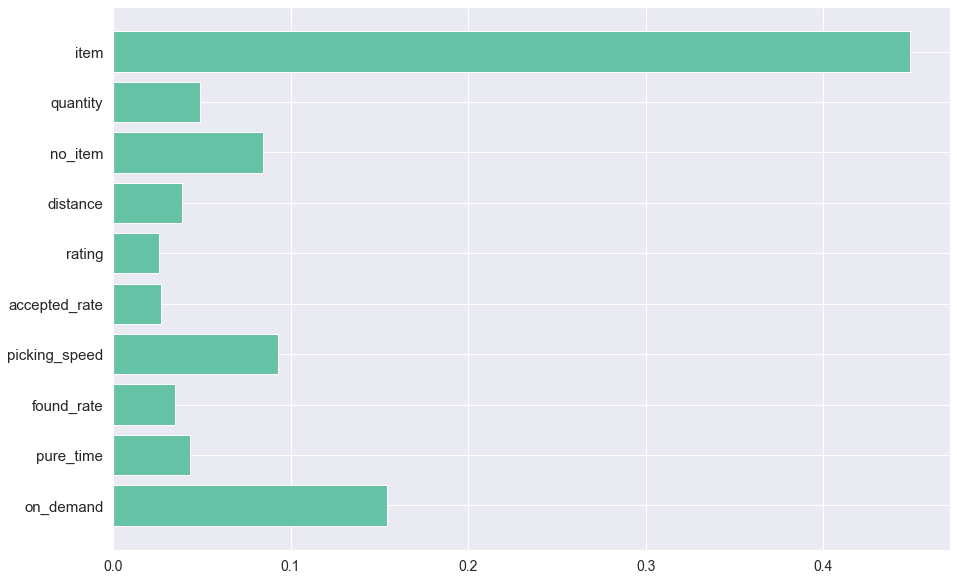

In [33]:
fig = plt.figure(figsize=(15,10))
plt.barh(Xs2_train.columns, xgbrs2.feature_importances_)

### Results

In [25]:
print(f"MSE: {mean_squared_error(y_test, y_pred_dXGBs2)}")
rmseXGBs2 = np.sqrt(mean_squared_error(y_test, y_pred_dXGBs2))
print(f"RMSE: {rmseXGBs2}")
r2XGBs2 = r2_score(y_test, y_pred_dXGBs2)
print(f"R2: {r2XGBs2}")
ar2XGBs2 = 1 - (1-r2XGBs2)*(len(y_train)-1)/(len(y_train)-Xs2_train.shape[1]-1)
print(f"adjusted-R2: {ar2XGBs2}")
y_true = y_test.total_minutes.values.tolist()
desviance_XGBs2 = (2 * np.sum((y_true - y_pred_dXGBs2) / y_pred_dXGBs2 - np.log(y_true) + np.log(y_pred_dXGBs2)))
print(f"test deviance: {desviance_XGBs2}")

MSE: 640.309939662616
RMSE: 25.304346260328796
R2: 0.5122415602439478
adjusted-R2: 0.5114781255284118
test deviance: 156.40997617187728


## Set4:  Fine-tuning

In [15]:
%%time

search.fit(Xs4_train, y_train)
print(search.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
{'colsample_bytree': 0.9953206542110655, 'gamma': 0.2628450911513429, 'learning_rate': 0.08150378575449105, 'max_depth': 4, 'n_estimators': 136, 'subsample': 0.6073562706189867}
Wall time: 4min 17s


### Best Parameters

In [16]:
best_params = search.best_params_
colsample_bytree = best_params["colsample_bytree"]
gamma = best_params["gamma"]
learning_rate = best_params["learning_rate"]
max_depth = best_params["max_depth"]
n_estimators = best_params["n_estimators"]
subsample = best_params["subsample"]

In [17]:
xgbrs4 = xgb.XGBRegressor(
    verbosity=0, 
    objective='reg:squarederror', 
    colsample_bytree=colsample_bytree, 
    gamma=gamma,
    learning_rate=learning_rate, 
    max_depth=max_depth, 
    n_estimators=n_estimators, 
    subsample=subsample
)
                        
print(xgbrs4)

xgbrs4.fit(Xs4_train, y_train)
y_pred_dXGBs4 = xgbrs4.predict(Xs4_test)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.9953206542110655,
             enable_categorical=False, gamma=0.2628450911513429, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.08150378575449105, max_delta_step=None,
             max_depth=4, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=136, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, scale_pos_weight=None,
             subsample=0.6073562706189867, tree_method=None,
             validate_parameters=None, verbosity=0)


### Feature Importance

In [18]:
for i in range(df[features_set4].columns.shape[0]):
    print(df[features_set4].columns[i] + ": " + str(xgbrs4.feature_importances_[i]))

seniority_41dc7c9e385c4d2b6c1f7836973951bf: 0.025047138
seniority_50e13ee63f086c2fe84229348bc91b5b: 0.011059753
seniority_6c90661e6d2c7579f5ce337c3391dbb9: 0.04135066
seniority_bb29b8d0d196b5db5a5350e5e3ae2b1f: 0.026446765
on_demand: 0.11491153
pure_time: 0.042998277
found_rate: 0.0334063
picking_speed: 0.085420616
accepted_rate: 0.025331687
rating: 0.029229632
distance: 0.037773117
no_item: 0.06522751
quantity: 0.037985284
item: 0.42381176


<BarContainer object of 14 artists>

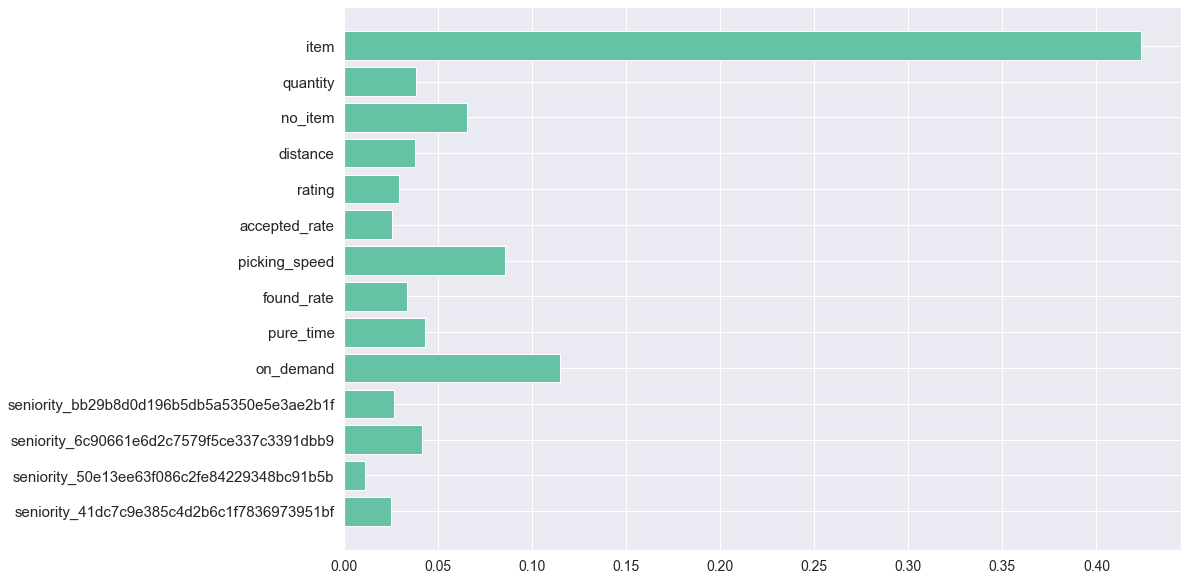

In [32]:
fig = plt.figure(figsize=(15,10))
plt.barh(Xs4_train.columns, xgbrs4.feature_importances_)

### Results

In [26]:
print(f"MSE: {mean_squared_error(y_test, y_pred_dXGBs4)}")
rmseXGBs4 = np.sqrt(mean_squared_error(y_test, y_pred_dXGBs4))
print(f"RMSE: {rmseXGBs4}")
r2XGBs4 = r2_score(y_test, y_pred_dXGBs4)
print(f"R2: {r2XGBs4}")
ar2XGBs4 = 1 - (1-r2XGBs4)*(len(y_train)-1)/(len(y_train)-Xs4_train.shape[1]-1)
print(f"adjusted-R2: {ar2XGBs4}")
y_true = y_test.total_minutes.values.tolist()
desviance_XGBs4 = (2 * np.sum((y_true - y_pred_dXGBs4) / y_pred_dXGBs4 - np.log(y_true) + np.log(y_pred_dXGBs4)))
print(f"test deviance: {desviance_XGBs4}")

MSE: 639.9420825419369
RMSE: 25.297076561174748
R2: 0.5125217767518004
adjusted-R2: 0.5114529129890009
test deviance: 155.78936142809266


# Overall Results

In [28]:
result = pd.DataFrame(data={
    'Features':['Set2','Set4'],
    "Model":['XGBRegressor', 'XGBRegressor'],
    "Fit Quality (R2)":[r2XGBs2, r2XGBs4],
    "Adjust-R2":[ar2XGBs2, ar2XGBs4],
    "Loss Function (RMSE)":[rmseXGBs2, rmseXGBs4],
    "Test Desviance":[desviance_XGBs2, desviance_XGBs4]
})

result.set_index(['Features', 'Model'])

,,Fit Quality (R2),Adjust-R2,Loss Function (RMSE),Test Desviance
Features,Model,,,,
Set2,XGBRegressor,0.512242,0.511478,25.304346,156.409976
Set4,XGBRegressor,0.512522,0.511453,25.297077,155.789361


# Save Model

In [34]:
joblib.dump(xgbrs4, DATE + '_set4_' + MODEL) 

['20220403_set4_XGBRegressor.sav']